Clean file: Rename headings, convert numbers to numbers, get rid of wrong types in columns, delete totally empty or uneeded columns

In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #https://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d
from matplotlib import cm

### From excel, save the csv to utf-8 then import, make sure col headings are good too

In [2]:
df = pd.read_csv('Documents\\Research\\Free_little_lib\\DataAnalysis\\bookData.csv')
# check the data frame info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 22 columns):
cataloger           1005 non-null object
bookid              1001 non-null object
count               1005 non-null int64
title               1005 non-null object
author              990 non-null object
yrpub               1005 non-null object
neighborhood        1005 non-null object
collection          1005 non-null object
type                1005 non-null object
age                 1005 non-null object
category1           1005 non-null object
category2           1005 non-null object
publication         989 non-null object
media               989 non-null object
summary             991 non-null object
deweywording        847 non-null object
subjects            473 non-null object
deweydec            846 non-null object
languages           964 non-null object
originalLang        931 non-null object
lcclassification    776 non-null object
isbn                947 non-null object
dty

In [3]:
#Convert Date to Number after removing the question marks (making them NaN)
df['yrpub'] = df['yrpub'].replace('?',None)
df['yrpub']=df['yrpub'].astype(int)
df.yrpub.unique()

array([1990, 1989, 1975, 2012, 1996, 2019, 2007, 1991, 1997, 2004, 1985,
       2005, 2001, 1998, 1988, 1946, 1979, 1983, 1976, 2017, 2018, 2008,
       2002, 1982, 1984, 1974, 1986, 1980, 2003, 1963, 2009, 2006, 2016,
       2011, 1967, 1993, 1999, 2015, 2000, 1994, 1950, 2013, 1960, 1954,
       1977, 1937, 1995, 1981, 2010, 1992, 1961, 1949, 1971, 1987, 1970,
       1962, 2014, 1928, 1978, 1966, 1968, 1958, 1965, 1964, 1959, 1969,
       1973, 1972], dtype=int64)

###  Group the categorical and numeric columns

In [4]:
numerical = [
  'yrpub','count'
]
categorical = [
  'neighborhood','collection','type','age','category1','category2','languages','originalLang'
]

bks = df[numerical + categorical]
bks.shape

(1005, 10)

In [5]:
bks['collection'].head()

0    CentralDistrict2
1    CentralDistrict2
2    CentralDistrict2
3    CentralDistrict5
4       ColumbiaCity2
Name: collection, dtype: object

### Test Pit

In [45]:
#bks.yrpub.unique()
#bks['yrpub'].describe()
#pd.to_numeric(df['Date'])

#group and look at a variable:
#bks[bks['yrpub'] == 2015].groupby('age')['yrpub'].count() #takes books from 2015, counts by age group

#Uses Crosstabs
#bksage = pd.crosstab(bks.collection, bks.age)
#bkstype = pd.crosstab(bks.collection, bks.type)
#bksage.columns=['adult','children','young-adult']
#bksage = bksage.reset_index()

age
Adult          18
Children's      5
Young Adult     1
Name: yrpub, dtype: int64

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Year Published')]

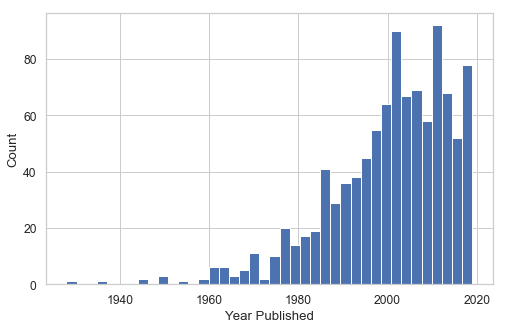

In [6]:
#Histogram of year published using mtlabplot
#yrhist = bks['yrpub'].plot.hist(bins=50)
#Same thing using seaborn
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    bks['yrpub'], norm_hist=False, kde=False, bins=40, hist_kws={"alpha": 1}
).set(xlabel='Year Published', ylabel='Count')


### Age Groups

Text(0, 0.5, 'number of books')

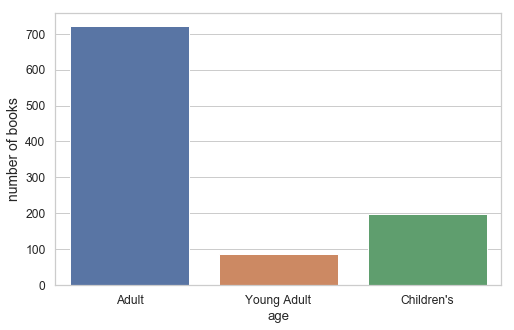

In [9]:
#uses matlibplot to count rows for each type and plot
#agedf = df.age.value_counts().plot(kind='pie') 
#plt.axis('equal')
#plt.title('Number of appearances in dataset')

#Using seaborn
plot = sns.countplot(bks['age']);
plot.set_ylabel("number of books",
                fontsize=14)

### Could chart all the categorical variables at once- but why?

In [8]:
#fig, ax = plt.subplots(2, 4, figsize=(20, 10))
#for variable, subplot in zip(categorical, ax.flatten()):
#    sns.countplot(bks[variable], ax=subplot)
#    for label in subplot.get_xticklabels():
#        label.set_rotation(90)
bks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 10 columns):
yrpub           1005 non-null int32
count           1005 non-null int64
neighborhood    1005 non-null object
collection      1005 non-null object
type            1005 non-null object
age             1005 non-null object
category1       1005 non-null object
category2       1005 non-null object
languages       964 non-null object
originalLang    931 non-null object
dtypes: int32(1), int64(1), object(8)
memory usage: 74.7+ KB


### LFL grouped datasets

### Fiction by neighborhood

C:\Users\Andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


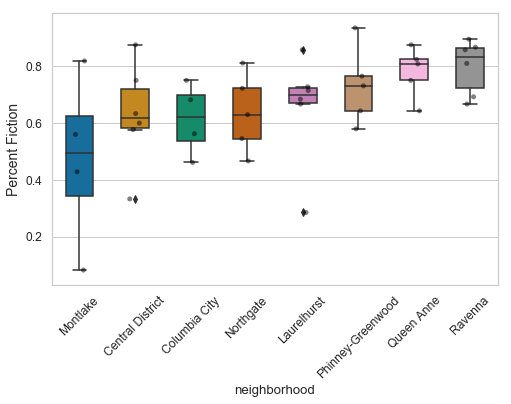

In [11]:
#For fiction books


#Groups count by Neighborhood, collection, and type (fiction or non fiction), calculate percent
bksfiction = bks.groupby(['neighborhood','collection', 'type'])['count'].sum().reset_index()
bksfiction['total'] = bksfiction.groupby('collection')['count'].transform('sum')
bksfiction['percent'] = bksfiction['count']/bksfiction['total']


#Select fiction
fic = bksfiction.loc[bksfiction['type']=='Fiction']

#Sort and reindex so that the chart goes low to hight
fic['median'] = fic.groupby('neighborhood')['percent'].transform('median')
fic = fic.sort_values(by=['median'], ascending=True).reset_index()


#Plots using Seaborn
bplot = sns.boxplot(y='percent', x='neighborhood', data=fic,
                 width=0.5,
                 palette="colorblind")

# add stripplot to boxplot with Seaborn
bplot=sns.stripplot(y='percent', x='neighborhood', data=fic, 
                   jitter=True, 
                   marker='o', 
                   alpha=0.5,
                   color='black')

#Set y axis label

bplot.set_ylabel("Percent Fiction",
                fontsize=14)

#rotate labels
for item in bplot.get_xticklabels():
    item.set_rotation(45)

In [72]:
fic.head(20)

,neighborhood,collection,type,count,total,percent
0,Central District,CentralDistrict1,Fiction,3,4,0.750000
2,Central District,CentralDistrict2,Fiction,14,16,0.875000
4,Central District,CentralDistrict3,Fiction,19,30,0.633333
6,Central District,CentralDistrict4,Fiction,15,26,0.576923
8,Central District,CentralDistrict5,Fiction,2,6,0.333333
10,Central District,CentralDistrict6,Fiction,6,10,0.600000
12,Columbia City,ColumbiaCity1,Fiction,6,13,0.461538
14,Columbia City,ColumbiaCity2,Fiction,9,16,0.562500
16,Columbia City,ColumbiaCity3,Fiction,21,28,0.750000
18,Columbia City,ColumbiaCity4,Fiction,15,22,0.681818


### Boxplot for age

Text(0, 0.5, 'number of books')

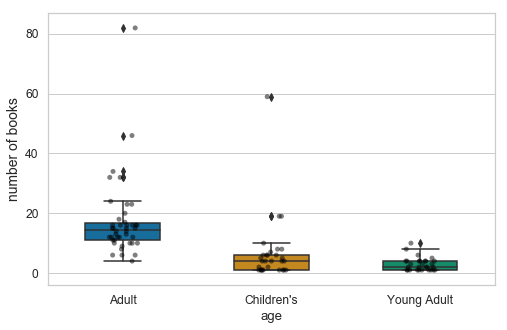

In [12]:
#Groups count by collection and age
bksage = bks.groupby(['collection','age'])['count'].sum().reset_index()
#bksage.head()

#Plots using Seaborn
bplot = sns.boxplot(y='count', x='age', data=bksage,
                 width=0.5,
                 palette="colorblind")

# add stripplot to boxplot with Seaborn
bplot=sns.stripplot(y='count', x='age', data=bksage, 
                   jitter=True, 
                   marker='o', 
                   alpha=0.5,
                   color='black')

bplot.set_ylabel("number of books",
                fontsize=14)

### Number of books by volume
Set up a seperate csv with lfl volume and house price. Make sure all numerical columns are number format. Year is okay as int

In [13]:
dfstats = pd.read_csv('Documents\Research\Free_little_lib\DataAnalysis\lfl-stats.csv')
# check the data frame info


In [14]:
dfstats['vol'] = (dfstats['width']*dfstats['length']*dfstats['height']/1728) #add a vol column with cubic feet units
dfstats = dfstats[np.isfinite(dfstats['vol'])] #Keep rows that have vol
dfstats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 1 to 40
Data columns (total 11 columns):
collection       40 non-null object
width            40 non-null float64
length           40 non-null float64
height           40 non-null float64
volMeters        40 non-null float64
housePrice       40 non-null object
address          40 non-null object
priceLastSold    36 non-null float64
yearLastSold     36 non-null float64
adjPrice         36 non-null float64
vol              40 non-null float64
dtypes: float64(8), object(3)
memory usage: 3.8+ KB


In [15]:
#Groups count by collection
bksct = bks.groupby(['neighborhood','collection'])['count'].sum().reset_index()
bksct.head()

,neighborhood,collection,count
0,Central District,CentralDistrict1,4
1,Central District,CentralDistrict2,16
2,Central District,CentralDistrict3,30
3,Central District,CentralDistrict4,26
4,Central District,CentralDistrict5,6


In [16]:
#Create a new dataframe of book counts and lfl stats. Inner join is intersection so removes rows with no partner in other dataframe
bksctstat = pd.merge(dfstats, bksct, on='collection', how='inner')

In [17]:
bksctstat.head()

,collection,width,length,height,volMeters,housePrice,address,priceLastSold,yearLastSold,adjPrice,vol,neighborhood,count
0,CentralDistrict2,22.0,11.0,12.0,0.047588,"730,824",1829 Martin Luther King Jr. Way,459900.0,2010.0,536554.0424,1.680556,Central District,16
1,CentralDistrict3,23.0,11.0,14.0,0.058043,"667,296",210 30th Ave.,60500.0,1989.0,124155.9225,2.049769,Central District,30
2,CentralDistrict4,16.0,13.5,21.0,0.074332,"764,635",3001 E. Harrison St.,325000.0,2004.0,437730.5987,2.625000,Central District,26
3,CentralDistrict5,13.0,14.5,12.0,0.037067,1278803,331 30th Ave.,757500.0,2013.0,827225.2702,1.309028,Central District,6
4,CentralDistrict6,16.5,9.0,20.0,0.048670,877110,537 Temple Pl.,339000.0,2002.0,479452.9534,1.718750,Central District,10


In [18]:
bksctstat['bkPerVol'] = bksctstat['count']/bksctstat['vol']
bksctstat.head(5)

,collection,width,length,height,volMeters,housePrice,address,priceLastSold,yearLastSold,adjPrice,vol,neighborhood,count,bkPerVol
0,CentralDistrict2,22.0,11.0,12.0,0.047588,"730,824",1829 Martin Luther King Jr. Way,459900.0,2010.0,536554.0424,1.680556,Central District,16,9.520661
1,CentralDistrict3,23.0,11.0,14.0,0.058043,"667,296",210 30th Ave.,60500.0,1989.0,124155.9225,2.049769,Central District,30,14.635799
2,CentralDistrict4,16.0,13.5,21.0,0.074332,"764,635",3001 E. Harrison St.,325000.0,2004.0,437730.5987,2.625000,Central District,26,9.904762
3,CentralDistrict5,13.0,14.5,12.0,0.037067,1278803,331 30th Ave.,757500.0,2013.0,827225.2702,1.309028,Central District,6,4.583554
4,CentralDistrict6,16.5,9.0,20.0,0.048670,877110,537 Temple Pl.,339000.0,2002.0,479452.9534,1.718750,Central District,10,5.818182


[Text(0, 0.5, 'Books per Cubic Foot'),
 Text(0.5, 0, 'Seattle Little Free Libraries')]

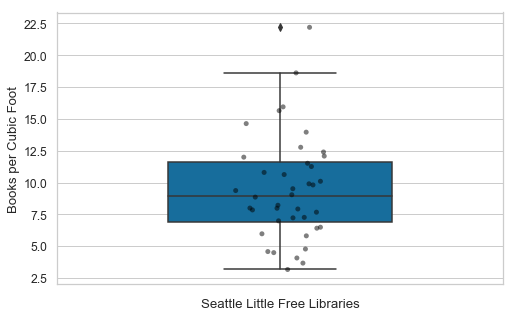

In [19]:
#Plots using Seaborn
bksctstatplot = sns.boxplot(y='bkPerVol', data=bksctstat,
                 width=0.5,
                 palette="colorblind")

# add stripplot to boxplot with Seaborn
bksctstatplot =sns.stripplot(y='bkPerVol', data=bksctstat, 
                   jitter=True, 
                   marker='o', 
                   alpha=0.5,
                   color='black')

bksctstatplot.set(xlabel='Seattle Little Free Libraries', ylabel='Books per Cubic Foot')

In [20]:
#Set up the dataframe to plot median book per volume by neighborhood

#Groups count by Neighborhood, calculate median
bksctstat['median'] = bksctstat.groupby('neighborhood')['bkPerVol'].transform('median')
bksctstat = bksctstat.sort_values(by=['median'], ascending=True).reset_index()
bksctstat.head(1)

,index,collection,width,length,height,volMeters,housePrice,address,priceLastSold,yearLastSold,adjPrice,vol,neighborhood,count,bkPerVol,median
0,19,Laurelhurst5,15.0,15.0,15.0,0.055306,1497532,6116 65th Ave NE,522500.0,2003.0,722576.8014,1.953125,Laurelhurst,22,11.264,7.132591


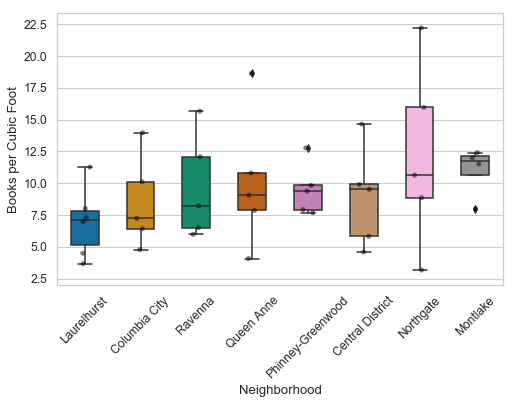

In [21]:
#Plots using Seaborn


bksctstatplot = sns.boxplot(y='bkPerVol', x='neighborhood', data=bksctstat,
                 width=0.5,
                 palette="colorblind")

# add stripplot to boxplot with Seaborn
bksctstatplot=sns.stripplot(y='bkPerVol', x='neighborhood', data=bksctstat, 
                   jitter=True, 
                   marker='o', 
                   alpha=0.5,
                   color='black')

bksctstatplot.set(xlabel='Neighborhood', ylabel='Books per Cubic Foot')

#rotate labels
for item in bksctstatplot.get_xticklabels():
    item.set_rotation(45)

# Scatter Plots

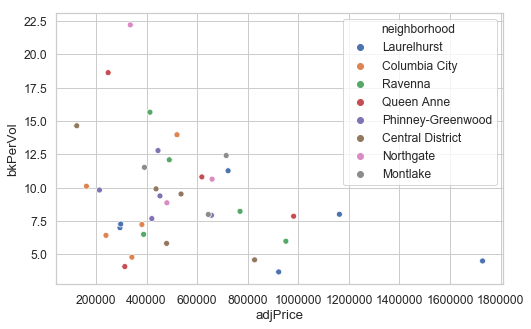

In [31]:
#Adjusted price (price house sold, but in today's dollars) vs books per vol)
bksctadj = sns.scatterplot(y='bkPerVol', x='adjPrice', data=bksctstat,
                 hue='neighborhood')

## Categories by Neighborhood
This creates a dataframe that recategorizes the least common categories in each LFL as 'Other'.  The resulting pie charts show the top 75% categories.

In [22]:
#Get percents of category1 by neighborhood
bkscat = bks.groupby(['neighborhood', 'category1'])['count'].sum().reset_index()
#Replace 'Null' with 'Childrens'
bkscat.loc[bkscat.category1 == 'Null', 'category1'] = 'Childrens'
#Create a total column grouped by neighborhood
bkscat['total'] = bkscat.groupby('neighborhood')['count'].transform('sum')
#create a percent column
bkscat['percent'] = bkscat['count']/bkscat['total']
#Sort by the percent
bkscat = bkscat.groupby('neighborhood').apply(pd.DataFrame.sort_values, 'percent', ascending=False)
#Neighborhood column at this point is both the grouping column and a data column, so delete the data one.
#bkscat = bkscat.drop('neighborhood', 1)
bkscat = bkscat.rename(columns={'neighborhood': 'hoodname'})
#Create a cumulative percent column by neighborhood
bkscat['cumulper'] = bkscat.groupby('neighborhood')['percent'].transform('cumsum')
#Create a new column with categories 75.5 or over in cumulper marked as 'other'
bkscat['newcat'] = np.where(bkscat['cumulper'] < .755, bkscat['category1'], 'Other')
bkscat.head(20)

hoodname                       category1  count  \
neighborhood                                                                   
Central District 10  Central District                           Novel     19   
                 11  Central District                       Childrens     13   
                 17  Central District               Thriller/Suspense      9   
                 8   Central District                         Mystery      7   
                 2   Central District  Biography/Autobiography/Memoir      6   
                 12  Central District                        Religion      6   
                 7   Central District                         History      6   
                 15  Central District                Self Help/Health      5   
                 0   Central District  Anthology/Essays/Short stories      4   
                 5   Central District                Cultural Studies      4   
                 14  Central District                   SciFi/Fantasy      3   
                 13  Central District                         Romance      2   
                 3   Central District             Business/Technology      2   
                 9   Central District                Nature/Gardening      2   
                 1   Central District                             Art      1   
                 6   Central District                   Graphic/Manga      1   
                 4   Central District                          Crafts      1   
                 16  Central District                          Sports      1   
Columbia City    29     Columbia City                           Novel     23   
                 35     Columbia City                Self Help/Health      7   

                     total   percent  cumulper                          newcat  
neighborhood                                                                    
Central District 10     92  0.206522  0.206522                           Novel  
                 11     92  0.141304  0.347826                       Childrens  
                 17     92  0.097826  0.445652               Thriller/Suspense  
                 8      92  0.076087  0.521739                         Mystery  
                 2      92  0.065217  0.586957  Biography/Autobiography/Memoir  
                 12     92  0.065217  0.652174                        Religion  
                 7      92  0.065217  0.717391                         History  
                 15     92  0.054348  0.771739                           Other  
                 0      92  0.043478  0.815217                           Other  
                 5      92  0.043478  0.858696                           Other  
                 14     92  0.032609  0.891304                           Other  
                 13     92  0.021739  0.913043                           Other  
                 3      92  0.021739  0.934783                           Other  
                 9      92  0.021739  0.956522                           Other  
                 1      92  0.010870  0.967391                           Other  
                 6      92  0.010870  0.978261                           Other  
                 4      92  0.010870  0.989130                           Other  
                 16     92  0.010870  1.000000                           Other  
Columbia City    29     85  0.270588  0.270588                           Novel  
                 35     85  0.082353  0.352941                Self Help/Health

In [23]:
#Sum the counts by newcat
bkscatsumall = bkscat.groupby(['neighborhood','newcat'])['count'].sum().reset_index()
bkscatsumall.head()

,neighborhood,newcat,count
0,Central District,Biography/Autobiography/Memoir,6
1,Central District,Childrens,13
2,Central District,History,6
3,Central District,Mystery,7
4,Central District,Novel,19


In [82]:
# THis categorical plot takes raw categorical data, counts and charts it.
#g = sns.catplot("category1", col="neighborhood", col_wrap=1,
#                data=bks,
#                kind="count")
bkscatsumall['neighborhood'].unique()

array(['Central District', 'Columbia City', 'Laurelhurst', 'Montlake',
       'Northgate', 'Phinney-Greenwood', 'Queen Anne', 'Ravenna'],
      dtype=object)

### Plot the categories 

In [24]:
# Remove the 'Other' category
bkscatsum = bkscatsumall[bkscatsumall['newcat'] != 'Other']
catnames = bkscatsum['newcat'].unique() #Create list of neighborhood names 
#These set up the color scheme for the pie charts
cmap = plt.cm.gist_earth
colors = cmap(np.linspace(0., 1., len(catnames)))
labels = catnames

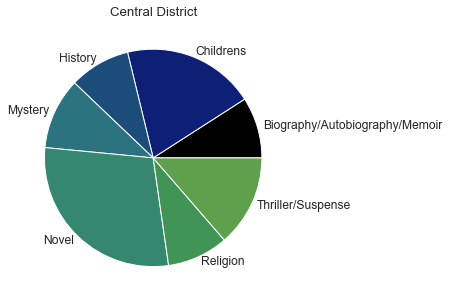

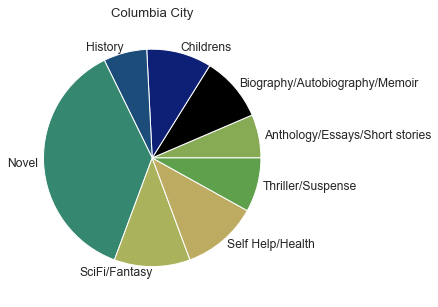

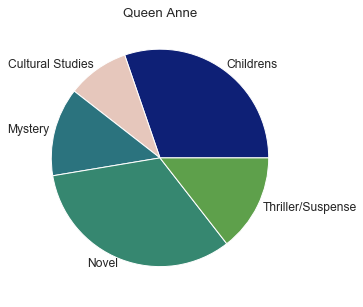

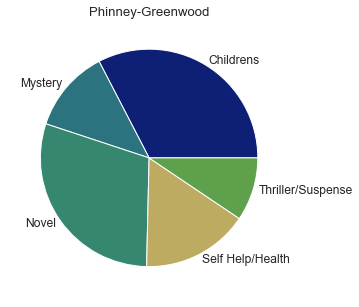

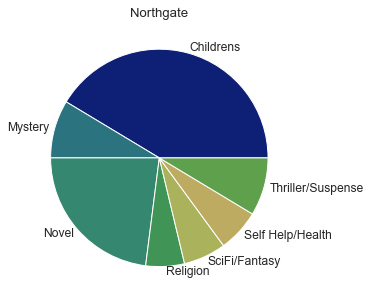

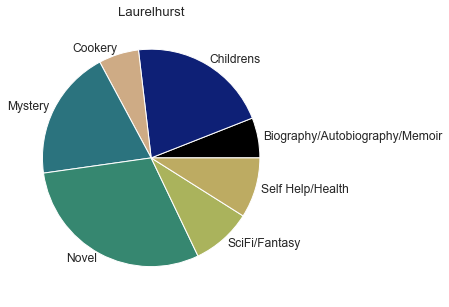

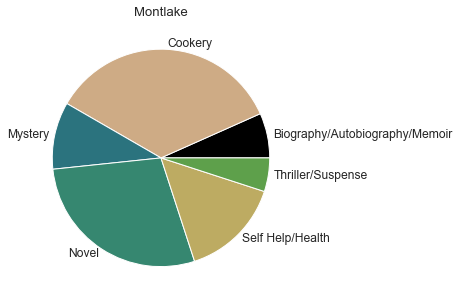

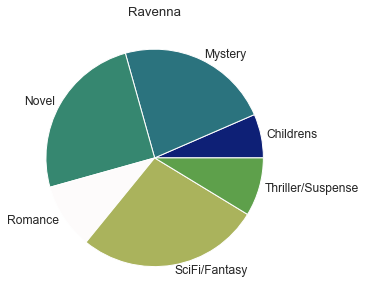

In [26]:
#There's got to be a way to put this all in a loop, but the function mypie assigns colors to the slices based on a dictionary so all colors by category are the same.

#https://stackoverflow.com/questions/35206282/assign-specific-colours-to-data-in-matplotlib-pie-chart
#https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

hood='Central District'

def mypie(slices,labels,colors):

    colordict={}
    for l,c in zip(labels,colors):
        #print(l,c)
        colordict[l]=c

    fig = plt.figure()
    ax = fig.add_subplot(111)

    pie_wedge_collection = ax.pie(slices, labels=bkscatsum[bkscatsum['neighborhood']==hood]['newcat'], labeldistance=1.05)#, autopct=make_autopct(slices))

    for pie_wedge in pie_wedge_collection[0]:
        pie_wedge.set_edgecolor('white')
        pie_wedge.set_facecolor(colordict[pie_wedge.get_label()])

    titlestring = hood

    ax.set_title(titlestring)

    return fig,ax,pie_wedge_collection

slices = bkscatsum[bkscatsum['neighborhood']==hood]['count']
fig,ax,pie_wedge_collection = mypie(slices,labels,colors)

hood1='Columbia City'

def mypie(slices,labels,colors):

    colordict={}
    for l,c in zip(labels,colors):
        #print(l,c)
        colordict[l]=c

    fig = plt.figure()
    ax = fig.add_subplot(111)

    pie_wedge_collection = ax.pie(slices, labels=bkscatsum[bkscatsum['neighborhood']==hood1]['newcat'], labeldistance=1.05)#, autopct=make_autopct(slices))

    for pie_wedge in pie_wedge_collection[0]:
        pie_wedge.set_edgecolor('white')
        pie_wedge.set_facecolor(colordict[pie_wedge.get_label()])

    titlestring = hood1

    ax.set_title(titlestring)

    return fig,ax,pie_wedge_collection

slices = bkscatsum[bkscatsum['neighborhood']==hood1]['count']
fig,ax,pie_wedge_collection = mypie(slices,labels,colors)

hood2='Queen Anne'

def mypie(slices,labels,colors):

    colordict={}
    for l,c in zip(labels,colors):
        #print(l,c)
        colordict[l]=c

    fig = plt.figure()
    ax = fig.add_subplot(111)

    pie_wedge_collection = ax.pie(slices, labels=bkscatsum[bkscatsum['neighborhood']==hood2]['newcat'], labeldistance=1.05)#, autopct=make_autopct(slices))

    for pie_wedge in pie_wedge_collection[0]:
        pie_wedge.set_edgecolor('white')
        pie_wedge.set_facecolor(colordict[pie_wedge.get_label()])

    titlestring = hood2

    ax.set_title(titlestring)

    return fig,ax,pie_wedge_collection

slices = bkscatsum[bkscatsum['neighborhood']==hood2]['count']
fig,ax,pie_wedge_collection = mypie(slices,labels,colors)

hood3='Phinney-Greenwood'

def mypie(slices,labels,colors):

    colordict={}
    for l,c in zip(labels,colors):
        #print(l,c)
        colordict[l]=c

    fig = plt.figure()
    ax = fig.add_subplot(111)

    pie_wedge_collection = ax.pie(slices, labels=bkscatsum[bkscatsum['neighborhood']==hood3]['newcat'], labeldistance=1.05)#, autopct=make_autopct(slices))

    for pie_wedge in pie_wedge_collection[0]:
        pie_wedge.set_edgecolor('white')
        pie_wedge.set_facecolor(colordict[pie_wedge.get_label()])

    titlestring = hood3

    ax.set_title(titlestring)

    return fig,ax,pie_wedge_collection

slices = bkscatsum[bkscatsum['neighborhood']==hood3]['count']
fig,ax,pie_wedge_collection = mypie(slices,labels,colors)

hood4='Northgate'

def mypie(slices,labels,colors):

    colordict={}
    for l,c in zip(labels,colors):
        #print(l,c)
        colordict[l]=c

    fig = plt.figure()
    ax = fig.add_subplot(111)

    pie_wedge_collection = ax.pie(slices, labels=bkscatsum[bkscatsum['neighborhood']==hood4]['newcat'], labeldistance=1.05)#, autopct=make_autopct(slices))

    for pie_wedge in pie_wedge_collection[0]:
        pie_wedge.set_edgecolor('white')
        pie_wedge.set_facecolor(colordict[pie_wedge.get_label()])

    titlestring = hood4

    ax.set_title(titlestring)

    return fig,ax,pie_wedge_collection

slices = bkscatsum[bkscatsum['neighborhood']==hood4]['count']
fig,ax,pie_wedge_collection = mypie(slices,labels,colors)

hood5='Laurelhurst'

def mypie(slices,labels,colors):

    colordict={}
    for l,c in zip(labels,colors):
        #print(l,c)
        colordict[l]=c

    fig = plt.figure()
    ax = fig.add_subplot(111)

    pie_wedge_collection = ax.pie(slices, labels=bkscatsum[bkscatsum['neighborhood']==hood5]['newcat'], labeldistance=1.05)#, autopct=make_autopct(slices))

    for pie_wedge in pie_wedge_collection[0]:
        pie_wedge.set_edgecolor('white')
        pie_wedge.set_facecolor(colordict[pie_wedge.get_label()])

    titlestring = hood5

    ax.set_title(titlestring)

    return fig,ax,pie_wedge_collection

slices = bkscatsum[bkscatsum['neighborhood']==hood5]['count']
fig,ax,pie_wedge_collection = mypie(slices,labels,colors)

hood6='Montlake'

def mypie(slices,labels,colors):

    colordict={}
    for l,c in zip(labels,colors):
        #print(l,c)
        colordict[l]=c

    fig = plt.figure()
    ax = fig.add_subplot(111)

    pie_wedge_collection = ax.pie(slices, labels=bkscatsum[bkscatsum['neighborhood']==hood6]['newcat'], labeldistance=1.05)#, autopct=make_autopct(slices))

    for pie_wedge in pie_wedge_collection[0]:
        pie_wedge.set_edgecolor('white')
        pie_wedge.set_facecolor(colordict[pie_wedge.get_label()])

    titlestring = hood6

    ax.set_title(titlestring)

    return fig,ax,pie_wedge_collection

slices = bkscatsum[bkscatsum['neighborhood']==hood6]['count']
fig,ax,pie_wedge_collection = mypie(slices,labels,colors)

hood7='Ravenna'

def mypie(slices,labels,colors):

    colordict={}
    for l,c in zip(labels,colors):
        #print(l,c)
        colordict[l]=c

    fig = plt.figure()
    ax = fig.add_subplot(111)

    pie_wedge_collection = ax.pie(slices, labels=bkscatsum[bkscatsum['neighborhood']==hood7]['newcat'], labeldistance=1.05)#, autopct=make_autopct(slices))

    for pie_wedge in pie_wedge_collection[0]:
        pie_wedge.set_edgecolor('white')
        pie_wedge.set_facecolor(colordict[pie_wedge.get_label()])

    titlestring = hood7

    ax.set_title(titlestring)

    return fig,ax,pie_wedge_collection

slices = bkscatsum[bkscatsum['neighborhood']==hood7]['count']
fig,ax,pie_wedge_collection = mypie(slices,labels,colors)

plt.show()